<a href="https://colab.research.google.com/github/MattBoraske/Reddit_AITA_LLMs/blob/main/AITA_dataset_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AITA dataset preparation

- [Raw dataset](https://huggingface.co/datasets/MattBoraske/AITA_subreddit_submissions)
- [Dataset with edits removed](https://huggingface.co/datasets/MattBoraske/AITA_subreddit_submissions_edits_removed)
- [Dataset with ambiguity score](https://huggingface.co/datasets/MattBoraske/AITA_subreddit_submissions_with_ambiguity_scores)
- [Dataset with lengthy outliers removed (FINAL DATASET)](https://huggingface.co/datasets/MattBoraske/AITA_subreddit_submissions_flanT5_filtered)

## Prepare environment

In [ ]:
!pip install datasets transformers pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00


In [ ]:
# mount gdrive to save results
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/WCU_THESIS/Dataset_Preparation

/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation


In [ ]:
!mkdir Removal_Of_Submission_Edits
!mkdir Ambiguity_Score_Analysis
!mkdir Top_Comment_Agreement_Analysis
!mkdir Removal_Of_Outliers
!mkdir Removal_Of_Outliers/Encoder_Filtering
!mkdir Removal_Of_Outliers/Decoder_Filtering

mkdir: cannot create directory ‘Removal_Of_Submission_Edits’: File exists
mkdir: cannot create directory ‘Ambiguity_Score_Analysis’: File exists
mkdir: cannot create directory ‘Top_Comment_Agreement_Analysis’: File exists
mkdir: cannot create directory ‘Removal_Of_Outliers’: File exists
mkdir: cannot create directory ‘Removal_Of_Outliers/Encoder_Filtering’: File exists
mkdir: cannot create directory ‘Removal_Of_Outliers/Decoder_Filtering’: File exists


## Histogram Plotting Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_histogram(train_data, test_data, plot_title, plot_xlabel, plot_ylabel, plot_file, bin_counts_file):
  '''
  Plots a histogram of the data in the train and test submissions.

  Parameters:
    train_data (numpy array): The data for the train submissions.
    test_data (numpy array): The data for the test submissions.
    plot_title (str): The title of the plot.
    plot_xlabel (str): The label for the x-axis.
    plot_ylabel (str): The label for the y-axis.
    plot_file (str): The file path to save the plot.
    bin_counts_file (str): The file path to save the bin counts.

  Returns:
    None - The plot and bin counts are saved to the specified files.
  '''

  # Calculate the common bin edges for both train and test submissions
  combined_data = np.concatenate([train_data, test_data])
  bin_edges = np.histogram_bin_edges(combined_data, bins=20)

  # Get histogram bin counts for train and test submissions
  train_counts, _ = np.histogram(train_data, bins=bin_edges)
  test_counts, _ = np.histogram(test_data, bins=bin_edges)

  # Plot histograms
  plt.figure(figsize=(12, 6))
  sns.histplot(train_data, bins=bin_edges, kde=True, label='Train Submissions')
  sns.histplot(test_data, bins=bin_edges, kde=True, label='Test Submissions')
  plt.xlabel(plot_xlabel, fontsize=14)
  plt.ylabel(plot_ylabel, fontsize=14)
  plt.legend()
  plt.title(plot_title, fontsize=16)
  plt.savefig(plot_file)
  plt.show()

  # Log Histogram Bin Counts
  bin_labels = [f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]
  counts_df = pd.DataFrame({'Bin Ranges': bin_labels, 'Test': test_counts, 'Train': train_counts}, index=bin_labels)

  # Pretty Print counts dataframe
  print(counts_df.to_string(index=False))

  # Save counts dataframe to CSV
  counts_df.to_csv(bin_counts_file, index=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_histogram_y_log(train_data, test_data, plot_title, plot_xlabel, plot_ylabel, plot_file, bin_counts_file):
    '''
    Plots a histogram of the data in the train and test submissions with a logarithmic y-axis.

    Parameters:
      train_data (numpy array): The data for the train submissions.
      test_data (numpy array): The data for the test submissions.
      plot_title (str): The title of the plot.
      plot_xlabel (str): The label for the x-axis.
      plot_ylabel (str): The label for the y-axis.
      plot_file (str): The file path to save the plot.
      bin_counts_file (str): The file path to save the bin counts.

    Returns:
      None - The plot and bin counts are saved to the specified files.
    '''

    # Calculate the common bin edges for both train and test submissions
    combined_data = np.concatenate([train_data, test_data])
    bin_edges = np.histogram_bin_edges(combined_data, bins=20)

    # Get histogram bin counts for train and test submissions
    train_counts, _ = np.histogram(train_data, bins=bin_edges)
    test_counts, _ = np.histogram(test_data, bins=bin_edges)

    # Plot histograms
    plt.figure(figsize=(12, 6))
    sns.histplot(train_data, bins=bin_edges, kde=True, label='Train Submissions')
    sns.histplot(test_data, bins=bin_edges, kde=True, label='Test Submissions')
    plt.xlabel(plot_xlabel, fontsize=14)
    plt.ylabel(plot_ylabel, fontsize=14)
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.legend()
    plt.title(plot_title, fontsize=16)
    plt.savefig(plot_file)
    plt.show()

    # Log Histogram Bin Counts
    bin_labels = [f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]
    counts_df = pd.DataFrame({'Bin Ranges': bin_labels, 'Test': test_counts, 'Train': train_counts}, index=bin_labels)

    # Pretty Print counts dataframe
    print(counts_df.to_string(index=False))

    # Save counts dataframe to CSV
    counts_df.to_csv(bin_counts_file, index=False)


## Token Analysis Code

In [ ]:
from transformers import PreTrainedTokenizer

def get_token_counts(dataset: dict, partition: str, column: str, tokenizer: PreTrainedTokenizer) -> list:
    """
    Counts the number of tokens in each row of a specified column in a dataset partition using a provided tokenizer.

    This function iterates through rows of a specified column in a given dataset partition,
    tokenizes each row using the provided tokenizer, and counts the number of tokens
    generated for each row.

    Parameters:
      dataset (dict): A huggingface dataset object.
      partition (str): The specific partition of the dataset to analyze (e.g., 'train').
      column (str): The name of the column in the dataset partition to process.
      tokenizer: A huggingface transformers pretrained tokenizer

    Returns:
      tokens_counts: A list of integers, where each integer represents the number of tokens in the
      corresponding row of the specified column.
    """

    # Extract the data from the specified column in the given partition of the dataset
    column_data = dataset[partition][column]

    # Initialize an empty list to store token counts for each row
    tokens_counts = []

    # Iterate through each row in the column data
    for row in column_data:
        # Tokenize the row and count the number of tokens
        row_tokens = tokenizer(row, padding=False, truncation=False, return_tensors="pt")
        tokens_count = len([tensor.item() for tensor in row_tokens['input_ids'][0]])

        # Append the token count to the list
        tokens_counts.append(tokens_count)

    # Return the list of token counts
    return tokens_counts

In [ ]:
from transformers import PreTrainedTokenizer
from datasets import Dataset

def add_token_counts_to_dataset(dataset: Dataset, partition: str, column: str, tokenizer: PreTrainedTokenizer, new_column_name: str) -> Dataset:
    """
    Adds a new column to a specified partition of a dataset with the number of tokens in each row of a specified column.

    Parameters:
      dataset (Dataset): A Hugging Face dataset object.
      partition (str): The specific partition of the dataset to analyze (e.g., 'train').
      column (str): The name of the column in the dataset partition to process.
      tokenizer: A Hugging Face transformers pretrained tokenizer
      new_column_name (str): The name of the new column to be added to the dataset.

    Returns:
      Dataset: The modified dataset with an additional column for token counts.
    """

    def count_tokens(row):
        # Tokenize the text and count the number of tokens
        row_tokens = tokenizer(row[column], padding=False, truncation=False, return_tensors="pt")
        tokens_count = len([tensor.item() for tensor in row_tokens['input_ids'][0]])
        return {new_column_name: tokens_count}

    # Update the specified partition of the dataset
    updated_dataset = dataset[partition].map(count_tokens)

    return updated_dataset

In [ ]:
from datasets import Dataset

def filter_by_token_count(dataset: Dataset, max_tokens: int, token_count_column: str) -> Dataset:
    """
    Filters out rows in a dataset where the token count exceeds a specified maximum.

    Parameters:
    dataset (Dataset): A Hugging Face dataset object.
    max_tokens (int): The maximum allowed number of tokens.
    token_count_column (str): The name of the column containing the token counts. Default is 'token_count'.

    Returns:
    Dataset: A new dataset with rows filtered based on the token count criteria.
    """

    def is_within_max_tokens(row):
        # Check if the token count for the row is less than or equal to max_tokens
        return row[token_count_column] <= max_tokens

    # Filter the dataset
    filtered_dataset = dataset.filter(is_within_max_tokens)

    return filtered_dataset

## Loading of Raw Dataset

In [ ]:
from datasets import load_dataset

dataset = load_dataset("MattBoraske/AITA_subreddit_submissions")

Generating train split:   0%|          | 0/91442 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10161 [00:00<?, ? examples/s]

## Removal of Edits in both Submission Texts and Top Comments

In [ ]:
import re

def remove_edits(text):
  """
  Removes the edits portion of a text

  Parameters:
    text: A string containing the text.

  Returns:
    A string with the edits removed, if present.
  """

  global edits_removed_counter

  if text == None:
    return text

  text = text.lower()

  pattern = r"(edit:|edit -|edit-|eta:|eta -|eta-|edited:|edited -|edited-|edit after:|edit after- |edit after -|edit afterwards:|edit afterwards -|edit afterwards-|edited to add:|edited to add -|edited to add-|update:|update-|update -|updated:|updated-|updated -)"
  match = re.search(pattern, text, flags=re.IGNORECASE)
  if match:
      # Increment the edits_removed_counter
      edits_removed_counter += 1
      # Return the text up to the start of the match
      return text[:match.start()].strip()
  return text

In [ ]:
def get_avg_length(strings):
  """
  Calculates the average length of a list of strings.

  Args:
    strings (list): A list of strings.

  Returns:
    float: The average length of the strings.
  """
  filtered_strings = [s for s in strings if s is not None]
  total_length = sum(len(s) for s in filtered_strings)
  average_length = total_length / len(filtered_strings) if filtered_strings else 0
  return average_length

In [ ]:
# extract texts that can contain edits (submissions and top comments)

texts_with_potential_edits = {
'train_submission_texts': dataset["train"]["submission_text"],
'train_top_comment_1': dataset["train"]["top_comment_1"],
'train_top_comment_2': dataset["train"]["top_comment_2"],
'train_top_comment_3': dataset["train"]["top_comment_3"],
'train_top_comment_4': dataset["train"]["top_comment_4"],
'train_top_comment_5': dataset["train"]["top_comment_5"],
'train_top_comment_6': dataset["train"]["top_comment_6"],
'train_top_comment_7': dataset["train"]["top_comment_7"],
'train_top_comment_8': dataset["train"]["top_comment_8"],
'train_top_comment_9': dataset["train"]["top_comment_9"],
'train_top_comment_10': dataset["train"]["top_comment_10"],
'test_submission_texts': dataset["test"]["submission_text"],
'test_top_comment_1': dataset["test"]["top_comment_1"],
'test_top_comment_2': dataset["test"]["top_comment_2"],
'test_top_comment_3': dataset["test"]["top_comment_3"],
'test_top_comment_4': dataset["test"]["top_comment_4"],
'test_top_comment_5': dataset["test"]["top_comment_5"],
'test_top_comment_6': dataset["test"]["top_comment_6"],
'test_top_comment_7': dataset["test"]["top_comment_7"],
'test_top_comment_8': dataset["test"]["top_comment_8"],
'test_top_comment_9': dataset["test"]["top_comment_9"],
'test_top_comment_10': dataset["test"]["top_comment_10"],
}

In [ ]:
# create the results dictionary

edits_removal_results = {
  'train':
    {
      'avg_lengths':{
        'with_edits':
          {
            # store before edits average lengths
            'submission_texts': get_avg_length(texts_with_potential_edits['train_submission_texts']),
            'top_comment_1': get_avg_length(texts_with_potential_edits['train_top_comment_1']),
            'top_comment_2': get_avg_length(texts_with_potential_edits['train_top_comment_2']),
            'top_comment_3': get_avg_length(texts_with_potential_edits['train_top_comment_3']),
            'top_comment_4': get_avg_length(texts_with_potential_edits['train_top_comment_4']),
            'top_comment_5': get_avg_length(texts_with_potential_edits['train_top_comment_5']),
            'top_comment_6': get_avg_length(texts_with_potential_edits['train_top_comment_6']),
            'top_comment_7': get_avg_length(texts_with_potential_edits['train_top_comment_7']),
            'top_comment_8': get_avg_length(texts_with_potential_edits['train_top_comment_8']),
            'top_comment_9': get_avg_length(texts_with_potential_edits['train_top_comment_9']),
            'top_comment_10': get_avg_length(texts_with_potential_edits['train_top_comment_10']),
          },
        'edits_removed':{}
      },
      'edits_removed_counts':{},
    },
  'test':
    {
      'avg_lengths':{
        'with_edits':
          {
            # store before edits average lengths
            'submission_texts': get_avg_length(texts_with_potential_edits['test_submission_texts']),
            'top_comment_1': get_avg_length(texts_with_potential_edits['test_top_comment_1']),
            'top_comment_2': get_avg_length(texts_with_potential_edits['test_top_comment_2']),
            'top_comment_3': get_avg_length(texts_with_potential_edits['test_top_comment_3']),
            'top_comment_4': get_avg_length(texts_with_potential_edits['test_top_comment_4']),
            'top_comment_5': get_avg_length(texts_with_potential_edits['test_top_comment_5']),
            'top_comment_6': get_avg_length(texts_with_potential_edits['test_top_comment_6']),
            'top_comment_7': get_avg_length(texts_with_potential_edits['test_top_comment_7']),
            'top_comment_8': get_avg_length(texts_with_potential_edits['test_top_comment_8']),
            'top_comment_9': get_avg_length(texts_with_potential_edits['test_top_comment_9']),
            'top_comment_10': get_avg_length(texts_with_potential_edits['test_top_comment_10']),
          },
        'edits_removed':{}
      },
      'edits_removed_counts':{},
    },
}

In [ ]:
# remove edits and collect counts of edits removed for each text type (submission and comment #)

from collections import defaultdict
edits_removed_dict = {}
edits_removed_dict['train'] = {}
edits_removed_dict['test'] = {}

train_dataset = dataset["train"]
test_dataset = dataset["test"]

global edits_removed_counter

# train submission texts
edits_removed_counter = 0
train_dataset = train_dataset.map(lambda x: {"submission_text": remove_edits(x["submission_text"])})
edits_removed_dict['train']['submission_text_edits_removed'] = edits_removed_counter

# train top comments
for i in range(1,11):
  edits_removed_counter = 0
  train_dataset = train_dataset.map(lambda x: {f"top_comment_{i}": remove_edits(x[f"top_comment_{i}"])})
  edits_removed_dict['train'][f"top_comment_{i}"] = edits_removed_counter

# test submission texts
edits_removed_counter = 0
test_dataset = test_dataset.map(lambda x: {"submission_text": remove_edits(x["submission_text"])})
edits_removed_dict['test']['submission_text_edits_removed'] = edits_removed_counter

# test top comments
for i in range(1,11):
  edits_removed_counter = 0
  test_dataset = test_dataset.map(lambda x: {f"top_comment_{i}": remove_edits(x[f"top_comment_{i}"])})
  edits_removed_dict['test'][f"top_comment_{i}"] = edits_removed_counter

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

In [ ]:
from datasets import DatasetDict

# reform dataset with edits now removed
dataset = DatasetDict({"train": train_dataset, "test": test_dataset})

In [ ]:
# extract texts that could have contained edits (submissions and top comments)

texts_with_potential_edits = {
'train_submission_texts': dataset["train"]["submission_text"],
'train_top_comment_1': dataset["train"]["top_comment_1"],
'train_top_comment_2': dataset["train"]["top_comment_2"],
'train_top_comment_3': dataset["train"]["top_comment_3"],
'train_top_comment_4': dataset["train"]["top_comment_4"],
'train_top_comment_5': dataset["train"]["top_comment_5"],
'train_top_comment_6': dataset["train"]["top_comment_6"],
'train_top_comment_7': dataset["train"]["top_comment_7"],
'train_top_comment_8': dataset["train"]["top_comment_8"],
'train_top_comment_9': dataset["train"]["top_comment_9"],
'train_top_comment_10': dataset["train"]["top_comment_10"],
'test_submission_texts': dataset["test"]["submission_text"],
'test_top_comment_1': dataset["test"]["top_comment_1"],
'test_top_comment_2': dataset["test"]["top_comment_2"],
'test_top_comment_3': dataset["test"]["top_comment_3"],
'test_top_comment_4': dataset["test"]["top_comment_4"],
'test_top_comment_5': dataset["test"]["top_comment_5"],
'test_top_comment_6': dataset["test"]["top_comment_6"],
'test_top_comment_7': dataset["test"]["top_comment_7"],
'test_top_comment_8': dataset["test"]["top_comment_8"],
'test_top_comment_9': dataset["test"]["top_comment_9"],
'test_top_comment_10': dataset["test"]["top_comment_10"],
}

In [ ]:
# store results

# lengths of train texts with edits removed
edits_removal_results['train']['avg_lengths']['edits_removed']['submission_texts'] = get_avg_length(texts_with_potential_edits['train_submission_texts'])
edits_removal_results['train']['avg_lengths']['edits_removed']['top_comment_1'] = get_avg_length(texts_with_potential_edits['train_top_comment_1'])
edits_removal_results['train']['avg_lengths']['edits_removed']['top_comment_2'] = get_avg_length(texts_with_potential_edits['train_top_comment_2'])
edits_removal_results['train']['avg_lengths']['edits_removed']['top_comment_3'] = get_avg_length(texts_with_potential_edits['train_top_comment_3'])
edits_removal_results['train']['avg_lengths']['edits_removed']['top_comment_4'] = get_avg_length(texts_with_potential_edits['train_top_comment_4'])
edits_removal_results['train']['avg_lengths']['edits_removed']['top_comment_5'] = get_avg_length(texts_with_potential_edits['train_top_comment_5'])
edits_removal_results['train']['avg_lengths']['edits_removed']['top_comment_6'] = get_avg_length(texts_with_potential_edits['train_top_comment_6'])
edits_removal_results['train']['avg_lengths']['edits_removed']['top_comment_7'] = get_avg_length(texts_with_potential_edits['train_top_comment_7'])
edits_removal_results['train']['avg_lengths']['edits_removed']['top_comment_8'] = get_avg_length(texts_with_potential_edits['train_top_comment_8'])
edits_removal_results['train']['avg_lengths']['edits_removed']['top_comment_9'] = get_avg_length(texts_with_potential_edits['train_top_comment_9'])
edits_removal_results['train']['avg_lengths']['edits_removed']['top_comment_10'] = get_avg_length(texts_with_potential_edits['train_top_comment_10'])

# lengths of test texts with edits removed
edits_removal_results['test']['avg_lengths']['edits_removed']['submission_texts'] = get_avg_length(texts_with_potential_edits['test_submission_texts'])
edits_removal_results['test']['avg_lengths']['edits_removed']['top_comment_1'] = get_avg_length(texts_with_potential_edits['test_top_comment_1'])
edits_removal_results['test']['avg_lengths']['edits_removed']['top_comment_2'] = get_avg_length(texts_with_potential_edits['test_top_comment_2'])
edits_removal_results['test']['avg_lengths']['edits_removed']['top_comment_3'] = get_avg_length(texts_with_potential_edits['test_top_comment_3'])
edits_removal_results['test']['avg_lengths']['edits_removed']['top_comment_4'] = get_avg_length(texts_with_potential_edits['test_top_comment_4'])
edits_removal_results['test']['avg_lengths']['edits_removed']['top_comment_5'] = get_avg_length(texts_with_potential_edits['test_top_comment_5'])
edits_removal_results['test']['avg_lengths']['edits_removed']['top_comment_6'] = get_avg_length(texts_with_potential_edits['test_top_comment_6'])
edits_removal_results['test']['avg_lengths']['edits_removed']['top_comment_7'] = get_avg_length(texts_with_potential_edits['test_top_comment_7'])
edits_removal_results['test']['avg_lengths']['edits_removed']['top_comment_8'] = get_avg_length(texts_with_potential_edits['test_top_comment_8'])
edits_removal_results['test']['avg_lengths']['edits_removed']['top_comment_9'] = get_avg_length(texts_with_potential_edits['test_top_comment_9'])
edits_removal_results['test']['avg_lengths']['edits_removed']['top_comment_10'] = get_avg_length(texts_with_potential_edits['test_top_comment_10'])

# counts of samples with edits removed for train texts
edits_removal_results['train']['edits_removed_counts']['submission_texts'] = edits_removed_dict['train']['submission_text_edits_removed']
edits_removal_results['train']['edits_removed_counts']['top_comment_1'] = edits_removed_dict['train']['top_comment_1']
edits_removal_results['train']['edits_removed_counts']['top_comment_2'] = edits_removed_dict['train']['top_comment_2']
edits_removal_results['train']['edits_removed_counts']['top_comment_3'] = edits_removed_dict['train']['top_comment_3']
edits_removal_results['train']['edits_removed_counts']['top_comment_4'] = edits_removed_dict['train']['top_comment_4']
edits_removal_results['train']['edits_removed_counts']['top_comment_5'] = edits_removed_dict['train']['top_comment_5']
edits_removal_results['train']['edits_removed_counts']['top_comment_6'] = edits_removed_dict['train']['top_comment_6']
edits_removal_results['train']['edits_removed_counts']['top_comment_7'] = edits_removed_dict['train']['top_comment_7']
edits_removal_results['train']['edits_removed_counts']['top_comment_8'] = edits_removed_dict['train']['top_comment_8']
edits_removal_results['train']['edits_removed_counts']['top_comment_9'] = edits_removed_dict['train']['top_comment_9']
edits_removal_results['train']['edits_removed_counts']['top_comment_10'] = edits_removed_dict['train']['top_comment_10']

# counts of samples with edits removed for test texts
edits_removal_results['test']['edits_removed_counts']['submission_texts'] = edits_removed_dict['test']['submission_text_edits_removed']
edits_removal_results['test']['edits_removed_counts']['top_comment_1'] = edits_removed_dict['test']['top_comment_1']
edits_removal_results['test']['edits_removed_counts']['top_comment_2'] = edits_removed_dict['test']['top_comment_2']
edits_removal_results['test']['edits_removed_counts']['top_comment_3'] = edits_removed_dict['test']['top_comment_3']
edits_removal_results['test']['edits_removed_counts']['top_comment_4'] = edits_removed_dict['test']['top_comment_4']
edits_removal_results['test']['edits_removed_counts']['top_comment_5'] = edits_removed_dict['test']['top_comment_5']
edits_removal_results['test']['edits_removed_counts']['top_comment_6'] = edits_removed_dict['test']['top_comment_6']
edits_removal_results['test']['edits_removed_counts']['top_comment_7'] = edits_removed_dict['test']['top_comment_7']
edits_removal_results['test']['edits_removed_counts']['top_comment_8'] = edits_removed_dict['test']['top_comment_8']
edits_removal_results['test']['edits_removed_counts']['top_comment_9'] = edits_removed_dict['test']['top_comment_9']
edits_removal_results['test']['edits_removed_counts']['top_comment_10'] = edits_removed_dict['test']['top_comment_10']

In [ ]:
# calculate percent changes in text lengths from removing edits and store this info in results dictionary

def calculate_percent_change(old_value, new_value):
    """Calculate the percent change between two values."""
    if old_value == 0:
        return 0
    return ((new_value - old_value) / old_value) * 100

for set_type in ['train', 'test']:
    avg_lengths_with_edits = edits_removal_results[set_type]['avg_lengths']['with_edits']
    avg_lengths_edits_removed = edits_removal_results[set_type]['avg_lengths']['edits_removed']

    percent_changes = {}
    for key in avg_lengths_with_edits.keys():
        percent_changes[key] = calculate_percent_change(avg_lengths_with_edits[key], avg_lengths_edits_removed[key])

    edits_removal_results[set_type]['percent_changes'] = percent_changes

In [ ]:
import json

# save results dictionary as json file
with open('/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Submission_Edits/edits_removal_results.json', 'w') as f:
    json.dump(edits_removal_results, f)

In [ ]:
dataset.push_to_hub("MattBoraske/AITA_subreddit_submissions_edits_removed")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/92 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/11 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/MattBoraske/AITA_subreddit_submissions_edits_removed/commit/4376a70d562cf4c46b69449fe681685eed470a51', commit_message='Upload dataset', commit_description='', oid='4376a70d562cf4c46b69449fe681685eed470a51', pr_url=None, pr_revision=None, pr_num=None)

## Ambiguity between Top Comments on a Per Sample Level
- Creation of a custom metric called "ambiguity score" (name TBD)

### Adding ambiguity score to dataset

In [ ]:
from datasets import load_dataset

# get dataset with edits removed
dataset = load_dataset("MattBoraske/AITA_subreddit_submissions_edits_removed")

Generating train split:   0%|          | 0/91442 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10161 [00:00<?, ? examples/s]

In [ ]:
import re
from datasets import Dataset
import numpy as np

def find_earliest_classification(text):
    '''
    Find the earliest AITA classification in a text.

    Args:
        text (str): The text to search for AITA classifications in.

    Returns:
        str: The earliest classification found in the text.
    '''

    # classifications mapped to their keywords
    classes_dictionary = {
      'NTA': ['not the asshole', 'not the a\*\*hole', 'nta', 'you would not be the asshole', 'you would not be the a**hole', 'ywnbta', 'n t a', 'y w b t a'],
      'NAH': ['no assholes here', 'no a\*\*holes here', 'nah', 'n a h'],
      'ESH': ['everyone sucks here', 'esh', 'e s h'],
      'INFO': ['more information needed', 'more info needed', 'more information required', 'more info required' 'info'],
      'YTA': ['you\'re the asshole', 'you\'re the a\*\*hole', 'youre the asshole', 'youre the a\*\*hole', 'yta', 'you would be the asshole', 'you would be the a\*\*hole', 'ywbta', 'y t a', 'y w b t a']
    }

    # track earliest match
    earliest_match = None
    earliest_match_pos = float('inf')  # Initially set to infinity

    # convert input text to lowercase
    text = text.lower()

    # go through all classifications and their keywords
    for key, phrases in classes_dictionary.items():
        # Create a regex pattern that includes the classification keywords
        pattern = r'\b(' + '|'.join(map(re.escape, phrases)) + r')\b'

        # Search for any keywords in the input text
        for match in re.finditer(pattern, text, re.IGNORECASE):
            if match.start() < earliest_match_pos:
                # Update the earliest match if this match is earlier
                earliest_match = key
                earliest_match_pos = match.start()

    # return the class that had the earliest match
    return earliest_match

def add_classification(row):
    '''
    Add comment AITA classifications to a row in the datset.

    Args:
        row (dict): A row from the dataset.

    Returns:
        dict: The row with comment AITA classifications added.
    '''
    # Iterate over top 10 comment keys
    for i in range(1, 11):
        key = f'top_comment_{i}'
        if key in row and isinstance(row[key], str):
            # if this row has a top_comment_N key, get the classification and add it to the row
            classification = find_earliest_classification(row[key])
            row[key + '_classification'] = classification
        else:
            # If the top_comment_N key doesn't exist, skip setting this key
            row[key + '_classification'] = None

    # return the row with the classification added
    return row

def calculate_ambiguity(classifications):
    '''
    Calculate the ambiguity score for a list of classifications.

    Args:
        classifications (list): A list of classifications.

    Returns:
        float: The ambiguity score.
    '''
    classification_values = {'YTA': 1, 'ESH': 2,
                             'INFO': 3, 'NAH': 4,
                             'NTA': 5}

    # convert classifications to their numeric representations
    numeric_values = [classification_values[c] for c in classifications if c is not None]

    # calculate ambiguity score as a function of mean and std dev
    mean = np.mean(numeric_values)
    std_dev = np.std(numeric_values)
    def f(mean):
        return (2 - abs(3 - mean)) ** 2 # parabolic that is lowest when mean is 1 or 5 and highest at 3 to emphasize ambiguity for YTA & NTA classes
    ambiguity_score = std_dev * f(mean)

    # normalize the ambiguity score on a 0-1 scale
    min_score = 0  # Minimum possible score (when std dev equals 0)
    max_score = 8.0  # Maximum possible score (when classes are equally YTA and NTA which results in max std dev and a central mean)
    normalized_score = (ambiguity_score - min_score) / (max_score - min_score)

    # return normalized ambiguity score
    return normalized_score

def add_ambiguity_score(row):
    # Extract classifications from top comments
    classifications = []
    for i in range(1, 11):  # Adjust the range based on the number of top comments
        classification_key = f'top_comment_{i}_classification'
        if classification_key in row and row[classification_key]:
            classifications.append(row[classification_key])

    # Calculate the ambiguity score if there are classifications
    if classifications:
        row['ambiguity_score'] = calculate_ambiguity(classifications)
    else:
        row['ambiguity_score'] = None  # or some default value

    return row

In [ ]:
# Add top comment classifications to dataset
dataset = dataset.map(add_classification)

# Add ambiguity scores to dataset
dataset = dataset.map(add_ambiguity_score)
dataset = dataset.filter(lambda x: x['ambiguity_score'] is not None)

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

Map:   0%|          | 0/91442 [00:00<?, ? examples/s]

Map:   0%|          | 0/10161 [00:00<?, ? examples/s]

Filter:   0%|          | 0/91442 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10161 [00:00<?, ? examples/s]

In [ ]:
# Push dataset with top comment classifications and ambiguity scores to huggingface hub
dataset.push_to_hub("MattBoraske/AITA_subreddit_submissions_with_ambiguity_scores")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/92 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/11 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/MattBoraske/AITA_subreddit_submissions_with_ambiguity_scores/commit/1c5a99c06f75e90cdd7844dd5571759a08d150f0', commit_message='Upload dataset', commit_description='', oid='1c5a99c06f75e90cdd7844dd5571759a08d150f0', pr_url=None, pr_revision=None, pr_num=None)

### Ambiguity score analysis

In [ ]:
!mkdir Ambiguity_Score_Analysis

#### Histogram of scores

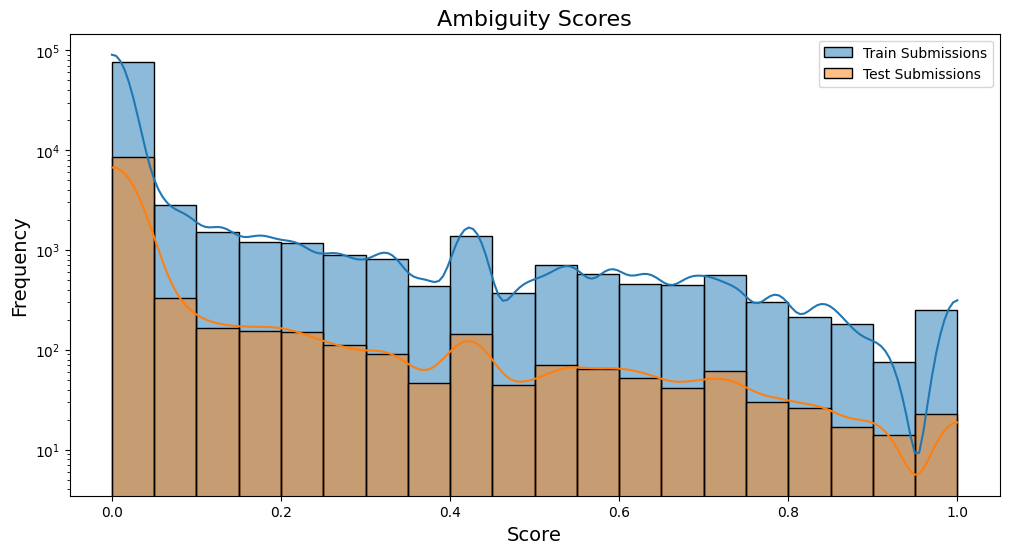

 Bin Ranges  Test  Train
0.00 - 0.05  8524  77021
0.05 - 0.10   327   2808
0.10 - 0.15   164   1503
0.15 - 0.20   156   1209
0.20 - 0.25   151   1175
0.25 - 0.30   111    899
0.30 - 0.35    91    809
0.35 - 0.40    47    439
0.40 - 0.45   143   1386
0.45 - 0.50    44    374
0.50 - 0.55    70    713
0.55 - 0.60    64    573
0.60 - 0.65    52    460
0.65 - 0.70    41    449
0.70 - 0.75    62    568
0.75 - 0.80    30    300
0.80 - 0.85    26    211
0.85 - 0.90    17    181
0.90 - 0.95    14     75
0.95 - 1.00    23    252


In [ ]:
# Plot token counts on log y histogram then save it and the bin counts

TITLE = "Ambiguity Scores"

plot_histogram_y_log(
    train_data = dataset['train']["ambiguity_score"],
    test_data = dataset['test']["ambiguity_score"],
    plot_title = TITLE,
    plot_xlabel = "Score",
    plot_ylabel = "Frequency",
    plot_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Ambiguity_Score_Analysis/{TITLE}.png",
    bin_counts_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Ambiguity_Score_Analysis/{TITLE}.csv"
)


#### Determing what portion of samples have zero ambiguity

In [ ]:
def zero_ambiguity_analysis(dataset):
  # Filter the dataset to include only samples with an ambiguity score of 0
  zero_ambiguity_dataset = dataset.filter(lambda x: x['ambiguity_score'] == 0)

  # Get counts for each dataset split
  train_count_zero = len(zero_ambiguity_dataset['train'])
  test_count_zero = len(zero_ambiguity_dataset['test'])
  total_count_zero = train_count_zero + test_count_zero

  # Get total counts for each dataset split
  total_train = len(dataset['train'])
  total_test = len(dataset['test'])
  total_dataset = total_train + total_test

  # Calculate percentages
  train_percentage = round((train_count_zero / total_train) * 100 if total_train else 0, 3)
  test_percentage = round((test_count_zero / total_test) * 100 if total_test else 0, 3)
  total_percentage = round((total_count_zero / total_dataset) * 100 if total_dataset else 0, 3)

  # Store results in dataframe and save to output CSV
  zero_ambiguity_results_df = pd.DataFrame({
      'Dataset Split': ['Train', 'Test', 'Total'],
      'Samples with an Ambiguity Score of Zero': [train_count_zero, test_count_zero, total_count_zero],
      'Percentage': [train_percentage, test_percentage, total_percentage]
  })
  zero_ambiguity_results_df.to_csv("/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Ambiguity_Score_Analysis/Zero_Ambiguity_Score_Counts.csv", index=False)

In [ ]:
zero_ambiguity_analysis(dataset)

#### Plot of ambiguity score percentiles

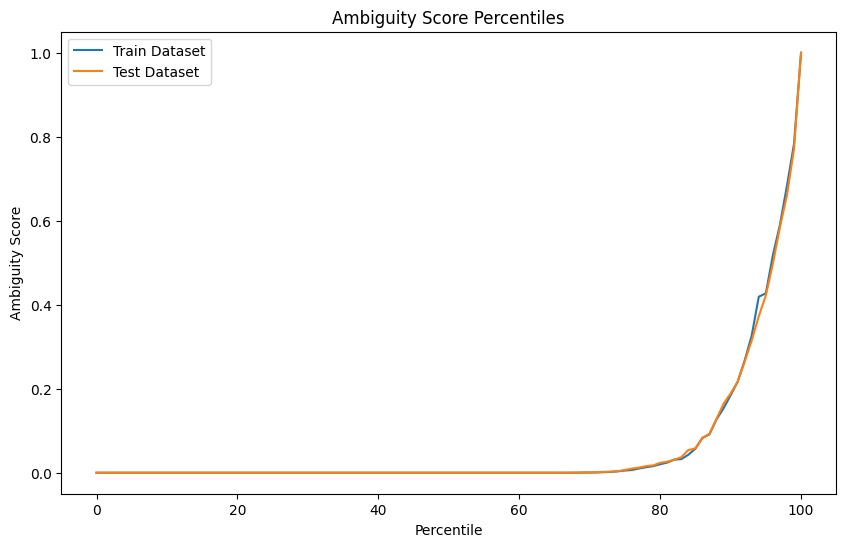

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the percentiles of the ambiguity scores for both train and test datasets
train_percentiles = np.percentile(dataset['train']["ambiguity_score"], np.arange(0, 101, 1))
test_percentiles = np.percentile(dataset['test']["ambiguity_score"], np.arange(0, 101, 1))

# Plot the percentiles for both datasets
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.plot(np.arange(0, 101, 1), train_percentiles, label='Train Dataset')
plt.plot(np.arange(0, 101, 1), test_percentiles, label='Test Dataset')
plt.xlabel("Percentile")
plt.ylabel("Ambiguity Score")
plt.title("Ambiguity Score Percentiles")
plt.legend()
plt.savefig("/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Ambiguity_Score_Analysis/Ambiguity_Score_Percentiles.png")
plt.show()


## Measures of Agreement Between Top Comments
- Overall: Krippendorff's Alpha
  - Key aspects
    - "Krippendorff's alpha coefficient,[1] named after academic Klaus Krippendorff, is a statistical measure of the agreement achieved when coding a set of units of analysis. Since the 1970s, alpha has been used in content analysis where textual units are categorized by trained readers, in counseling and survey research where experts code open-ended interview data into analyzable terms, in psychological testing where alternative tests of the same phenomena need to be compared, or in observational studies where unstructured happenings are recorded for subsequent analysis."
    - "Krippendorff's alpha generalizes several known statistics, often called measures of inter-coder agreement, inter-rater reliability, reliability of coding given sets of units (as distinct from unitizing) but it also distinguishes itself from statistics that are called reliability coefficients but are unsuitable to the particulars of coding data generated for subsequent analysis."
    - "Krippendorff's alpha is applicable to any number of coders, each assigning one value to one unit of analysis, to incomplete (missing) data, to any number of values available for coding a variable, to binary, nominal, ordinal, interval, ratio, polar, and circular metrics (note that this is not a metric in the mathematical sense, but often the square of a mathematical metric, see levels of measurement), and it adjusts itself to small sample sizes of the reliability data. The virtue of a single coefficient with these variations is that computed reliabilities are comparable across any numbers of coders, values, different metrics, and unequal sample sizes.
  - [Wiki](https://en.wikipedia.org/wiki/Krippendorff%27s_alpha)
  - [Lecture by Krippendorff on Calculation](https://www.asc.upenn.edu/sites/default/files/2021-03/Computing%20Krippendorff%27s%20Alpha-Reliability.pdf)
  - [Article Explanation](https://www.surgehq.ai/blog/inter-rater-reliability-metrics-an-introduction-to-krippendorffs-alpha)
    - Ranges from -1 to 1, with -1 being complete disagreement, 0 being random choice, and 1 being complete agreement
    - 0.8 indicates significant agreement.

- Pairwise: Cohen's Kappa
  - [Wiki](https://en.wikipedia.org/wiki/Cohen%27s_kappa)
  - [Article Explanation](https://towardsdatascience.com/multi-class-metrics-made-simple-the-kappa-score-aka-cohens-kappa-coefficient-bdea137af09c)

In [ ]:
# https://github.com/pln-fing-udelar/fast-krippendorff/tree/main
!pip install krippendorff

In [ ]:
import numpy as np
import krippendorff
from sklearn.metrics import cohen_kappa_score
from itertools import combinations

def get_encoded_classifications(dataset):
    """
    Encodes AITA classifications into numeric values, retaining None values.

    Parameters:
    dataset (list of dictionaries): A huggingface dataset

    Returns:
    list[list]: Lists of numeric classifications, with None where input was None
    """

    # Mapping of AITA classifications to numeric values
    classification_values = {'YTA': 1, 'ESH': 2,
                             'INFO': 3, 'NAH': 4,
                             'NTA': 5}

    # Initialize a list of lists, one for each of the top 10 comments
    top_comments = [[] for _ in range(10)]

    # Iterate over each sample in the dataset
    for sample in dataset:
        # Iterate over the top 10 comments
        for i in range(10):
            key = f'top_comment_{i+1}_classification'
            # Append the classification to the corresponding list
            top_comments[i].append(sample.get(key, None))

    # Convert classifications to their numeric representations, keeping None as is
    top_comments_encoded = []
    for i in range(len(top_comments)):
        encoded_comment = [classification_values.get(c, None) for c in top_comments[i]]
        top_comments_encoded.append(encoded_comment)
    return top_comments_encoded


def calculate_krippendorffs_alpha(dataset):
  """
  Calculates Krippendorff's alpha for a given dataset.

  Parameters:
  dataset (list of dictionaries): A huggingface dataset.

  Returns:
  float: Krippendorff's alpha score.
  """

  # Encode top comment classifications
  top_comments_encoded = get_encoded_classifications(dataset)

  # Calculate and return krippendorff's alpha
  data = np.array([[np.nan if x is None else x for x in sublist] for sublist in top_comments_encoded], dtype=float)
  return krippendorff.alpha(data)


def calculate_cohen_kappa(dataset):
  """
  Calculates Cohen's Kappa score for a given dataset.

  Parameters:
  dataset (list of dictionaries): A huggingface dataset.

  Returns:
  dict: A dictionary of Cohen's Kappa scores for each pair of top comments.
  """

  # Encode top comment classifications
  top_comments_encoded = get_encoded_classifications(dataset)

  scores = {}
  for list1, list2 in combinations(top_comments_encoded, 2):
      filtered_list1 = []
      filtered_list2 = []
      for true, pred in zip(list1, list2):
          if true is not None and pred is not None:
              filtered_list1.append(true)
              filtered_list2.append(pred)
      score = cohen_kappa_score(filtered_list1, filtered_list2)
      index1 = top_comments_encoded.index(list1)
      index2 = top_comments_encoded.index(list2)
      key = (f"top_comment_{index1 + 1}", f"top_comment_{index2 + 1}")
      scores[key] = score
  return scores


def save_cohen_kappa_scores(cohen_kappa_scores, output_file):
  """
  Saves Cohen's Kappa scores to a CSV file.

  Parameters:
  cohen_kappa_scores (dict): A dictionary of Cohen's Kappa scores.
  output_file (str): The path to the output CSV file.
  """

  # Create a list of column and row names
  comments = [f"top_comment_{i}" for i in range(1, 11)]

  # Create an empty DataFrame
  df = pd.DataFrame(index=comments, columns=comments)

  # Fill the DataFrame with scores, rounding to three decimals
  for (comment1, comment2), score in cohen_kappa_scores.items():
      df.at[comment1, comment2] = round(score, 3)

  # Set the lower triangle to NaN, including the diagonal
  for i in range(len(df)):
      for j in range(i + 1):
          df.iat[i, j] = np.nan

  # Save the DataFrame to a CSV file
  df.to_csv(output_file, index=True)

In [ ]:
import json

# Calculate Krippendorrf's alphas for train and test datasets then save them to JSON
train_krippendorffs_alpha = calculate_krippendorffs_alpha(dataset['train'])
test_krippendorffs_alpha = calculate_krippendorffs_alpha(dataset['test'])

krippendorffs_alphas = {
    "train": train_krippendorffs_alpha,
    "test": test_krippendorffs_alpha,
}

with open("/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Top_Comment_Agreement_Analysis/krippendorffs_alphas.json", "w") as f:
    json.dump(krippendorffs_alphas, f)

# Calculate Cohen's Kappa scores for train and test datasets and save them to CSV
train_cohen_kappa_scores = calculate_cohen_kappa(dataset['train'])
test_cohen_kappa_scores = calculate_cohen_kappa(dataset['test'])
save_cohen_kappa_scores(train_cohen_kappa_scores, 'Top_Comment_Agreement_Analysis/train_cohen_kappa_scores.csv')
save_cohen_kappa_scores(test_cohen_kappa_scores, 'Top_Comment_Agreement_Analysis/test_cohen_kappa_scores.csv')

## Removal of Lengthy Outliers to Fine-tune on Appropriate Context Windows

Why?
- Because this creates a nice normal distribution and only removes a marginal amount of lengthy outliers (both submissions and top comments)

Strategy:
- Will filter for submissions that are less than 1024 Flan-T5 tokens and comments that are less than 256 Flan-T5 tokens
- To account for the different tokenizer used for Flan-T5 and Llama-2, when fine-tuning Llama-2, will pad input tokens to the submission and top comment that consist of the most Llama-2 tokens
  - Llama2 paper - "We use the same tokenizer as Llama 1; it employs a bytepair encoding (BPE) algorithm (Sennrich
  et al., 2016) using the implementation from SentencePiece (Kudo and Richardson, 2018)."
    - Context window - "We expand the context window for Llama 2 from 2048 tokens to 4096 tokens"
  - T5 paper - "We use SentencePiece (Kudo and Richardson, 2018) to encode text as WordPiece tokens (Sennrich et al., 2015; Kudo, 2018)"



In [ ]:
from datasets import load_dataset

dataset = load_dataset("MattBoraske/AITA_subreddit_submissions_with_ambiguity_scores")

### AITA prefix prompt evaluation

In [ ]:
AITA_classifications = [
    "\nYou're The A**hole (YTA) when the first person (you, the writer of the conflict context) is causing the conflict.",
    "\nNot The A**hole (NTA) when a third person party (anyone but the writer of the conflict context) is causing the conflict.",
    "\nNo A**holes Here (NAH) when no parties are causing the conflict.",
    "\nEveryone Sucks Here (ESH) when all parties are causing the conflict.",
    "\nMore Information Needed (INFO) when a classification can not be classified using the conflict context."
]

In [ ]:
INSTRUCTION_PREFIX = f"Classify the interpersonal conflict  into one of the following categories and provide a justification for your choice. The categories are: {''.join(AITA_classifications)}\n\nConflict Context: "

In [ ]:
print(INSTRUCTION_PREFIX)

Classify the interpersonal conflict  into one of the following categories and provide a justification for your choice. The categories are: 
You're The A**hole (YTA) when the first person (you, the writer of the conflict context) is causing the conflict.
Not The A**hole (NTA) when a third person party (anyone but the writer of the conflict context) is causing the conflict.
No A**holes Here (NAH) when no parties are causing the conflict.
Everyone Sucks Here (ESH) when all parties are causing the conflict.
More Information Needed (INFO) when a classification can not be classified using the conflict context.

Conflict Context: 


In [ ]:
from transformers import AutoTokenizer

TOKENIZER = AutoTokenizer.from_pretrained("google/flan-t5-xl")
instruction_prefix_flanT5_token_count = len(TOKENIZER(INSTRUCTION_PREFIX)["input_ids"])

TOKENIZER = AutoTokenizer.from_pretrained("meta-llama/Llama-2-13b-chat-hf")
instruction_prefix_llama2_token_count = len(TOKENIZER(INSTRUCTION_PREFIX)["input_ids"])

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [ ]:
print(f"FLAN-T5 instruction prefix token count: {instruction_prefix_flanT5_token_count}")
print(f"Llama-2 instruction prefix token count: {instruction_prefix_llama2_token_count}")

FLAN-T5 instruction prefix token count: 152
Llama-2 instruction prefix token count: 156


### Encoder Filtering (Submission Text)
- Using encoder context window of 1024

In [ ]:
from transformers import AutoTokenizer

# get number of tokens needed for AITA instruction prefix so that it can be accounted for
# when considering how much of the context window is available for the submission text

TOKENIZER = AutoTokenizer.from_pretrained("google/flan-t5-xl")
INSTRUCTION_PREFIX_TOKEN_COUNT = len(TOKENIZER(INSTRUCTION_PREFIX)["input_ids"])
FLAN_T5_ENCODER_CONTEXT_LENGTH = 1024
SUBMISSION_TEXT_CONTEXT_WINDOW = FLAN_T5_ENCODER_CONTEXT_LENGTH - INSTRUCTION_PREFIX_TOKEN_COUNT

print(f'Available tokens in context window for submission text: {SUBMISSION_TEXT_CONTEXT_WINDOW}')

Available tokens in context window for submission text: 872


In [ ]:
from transformers import AutoTokenizer
from datasets import DatasetDict

# add FLAN-T5 token counts for submission texts to dataset

TOKENIZER = AutoTokenizer.from_pretrained("google/flan-t5-xl")
PARTITIONS = [("train", "submission_text", "submission_text_token_counts"), ("test", "submission_text", "submission_text_token_counts")]

temp_datasets = {}
for PARTITION, COLUMN, NEW_COLUMN_NAME in PARTITIONS:
    temp_datasets[PARTITION] = add_token_counts_to_dataset(dataset, PARTITION, COLUMN, TOKENIZER, NEW_COLUMN_NAME)

dataset = DatasetDict({"train": temp_datasets['train'], "test": temp_datasets['test']})

Map:   0%|          | 0/91405 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (721 > 512). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/10157 [00:00<?, ? examples/s]

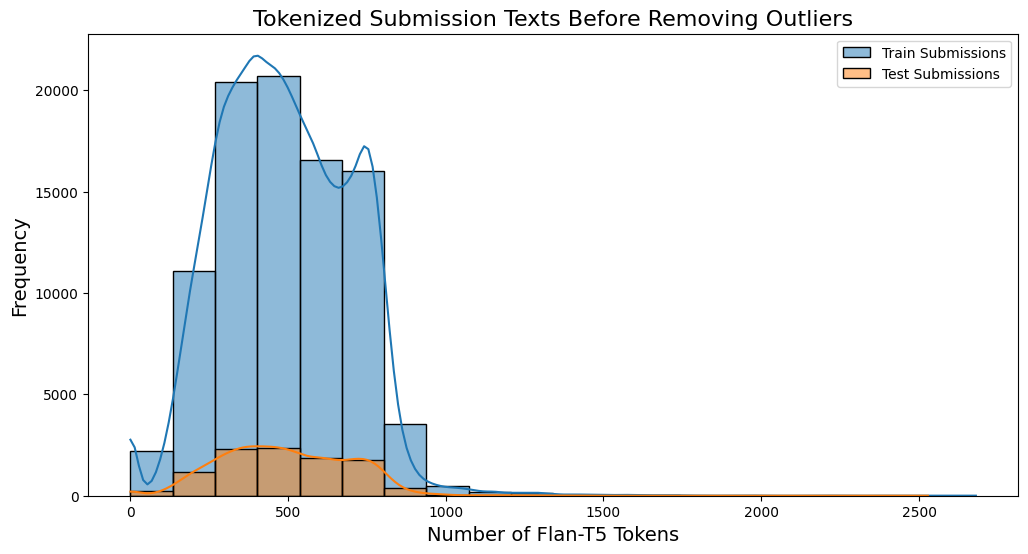

       Bin Ranges  Test  Train
    1.00 - 134.95   241   2219
  134.95 - 268.90  1152  11086
  268.90 - 402.85  2296  20384
  402.85 - 536.80  2354  20684
  536.80 - 670.75  1843  16533
  670.75 - 804.70  1771  16020
  804.70 - 938.65   394   3523
 938.65 - 1072.60    54    461
1072.60 - 1206.55    25    200
1206.55 - 1340.50    15    139
1340.50 - 1474.45    10     58
1474.45 - 1608.40     1     39
1608.40 - 1742.35     0     25
1742.35 - 1876.30     0      8
1876.30 - 2010.25     0      8
2010.25 - 2144.20     0      3
2144.20 - 2278.15     0      5
2278.15 - 2412.10     0      2
2412.10 - 2546.05     1      5
2546.05 - 2680.00     0      3


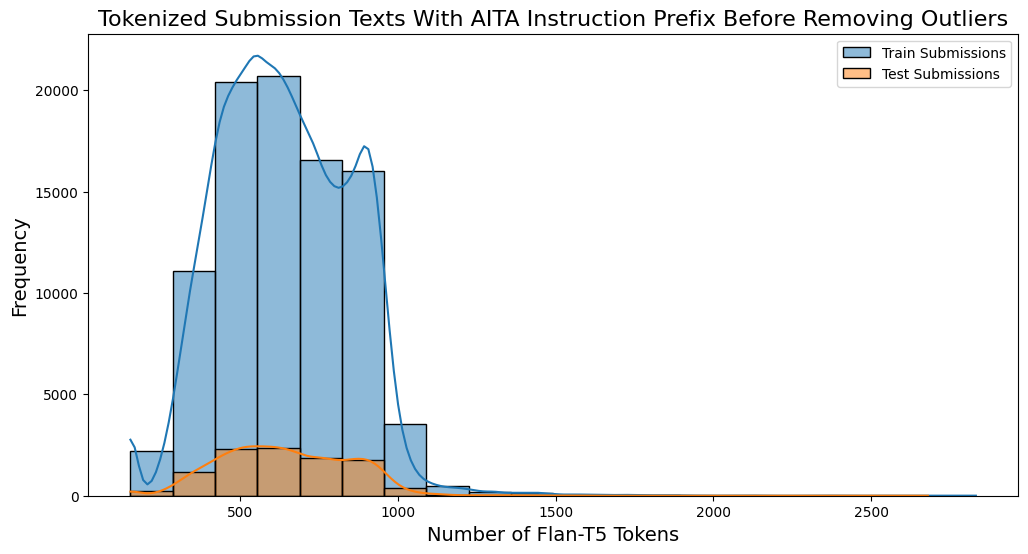

       Bin Ranges  Test  Train
  153.00 - 286.95   241   2219
  286.95 - 420.90  1152  11086
  420.90 - 554.85  2296  20384
  554.85 - 688.80  2354  20684
  688.80 - 822.75  1843  16533
  822.75 - 956.70  1771  16020
 956.70 - 1090.65   394   3523
1090.65 - 1224.60    54    461
1224.60 - 1358.55    25    200
1358.55 - 1492.50    15    139
1492.50 - 1626.45    10     58
1626.45 - 1760.40     1     39
1760.40 - 1894.35     0     25
1894.35 - 2028.30     0      8
2028.30 - 2162.25     0      8
2162.25 - 2296.20     0      3
2296.20 - 2430.15     0      5
2430.15 - 2564.10     0      2
2564.10 - 2698.05     1      5
2698.05 - 2832.00     0      3


In [ ]:
# plot histograms of tokenized submissions texts before removing outliers - with and without AITA instruction prefix

TITLE = "Tokenized Submission Texts Before Removing Outliers"

plot_histogram(
    train_data = dataset['train']["submission_text_token_counts"],
    test_data = dataset['test']["submission_text_token_counts"],
    plot_title = TITLE,
    plot_xlabel = "Number of Flan-T5 Tokens",
    plot_ylabel = "Frequency",
    plot_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Encoder_Filtering/{TITLE}.png",
    bin_counts_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Encoder_Filtering/{TITLE}.csv"
)

TITLE = "Tokenized Submission Texts With AITA Instruction Prefix Before Removing Outliers"

plot_histogram(
    train_data = [x + INSTRUCTION_PREFIX_TOKEN_COUNT for x in dataset['train']["submission_text_token_counts"]],
    test_data = [x + INSTRUCTION_PREFIX_TOKEN_COUNT for x in dataset['test']["submission_text_token_counts"]],
    plot_title = TITLE,
    plot_xlabel = "Number of Flan-T5 Tokens",
    plot_ylabel = "Frequency",
    plot_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Encoder_Filtering/{TITLE}.png",
    bin_counts_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Encoder_Filtering/{TITLE}.csv"
)

In [ ]:
# filter out samples where the tokenized instruction prefix + submission text don't fit within 1024 tokens

total_dataset_samples = {}
samples_in_context_window = {}
filtering_percent_change = {}
temp_datasets = {}

partitions = ['train', 'test']

for partition in partitions:
    total_dataset_samples[partition] = len(dataset[partition])
    temp_datasets[partition] = filter_by_token_count(dataset[partition], SUBMISSION_TEXT_CONTEXT_WINDOW, "submission_text_token_counts")
    samples_in_context_window[partition] = len(temp_datasets[partition])
    filtering_percent_change[partition] = (samples_in_context_window[partition] - total_dataset_samples[partition]) / total_dataset_samples[partition] * 100

dataset = DatasetDict({"train": temp_datasets['train'], "test": temp_datasets['test']})

Filter:   0%|          | 0/91405 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10157 [00:00<?, ? examples/s]

In [ ]:
import json

# save filtering results to output JSON

encoder_filtering_results = {
    "train": {
        "total_samples": total_dataset_samples['train'],
        "samples_in_context_window": samples_in_context_window['train'],
        "percent_change": filtering_percent_change['train']
    },
    "test": {
        "total_samples": total_dataset_samples['test'],
        "samples_in_context_window": samples_in_context_window['test'],
        "percent_change": filtering_percent_change['test']
    }
}
file_path = '/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Encoder_Filtering/flanT5_encoder_filtering_results.json'
with open(file_path, 'w') as json_file:
    json.dump(encoder_filtering_results, json_file)

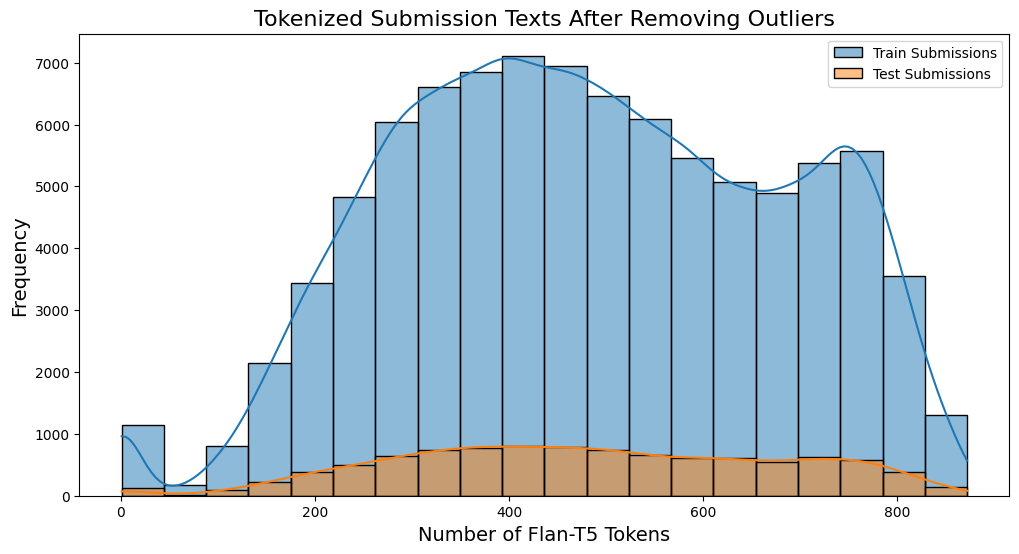

     Bin Ranges  Test  Train
   1.00 - 44.55   124   1140
  44.55 - 88.10    16    171
 88.10 - 131.65    87    803
131.65 - 175.20   229   2152
175.20 - 218.75   380   3445
218.75 - 262.30   490   4828
262.30 - 305.85   638   6040
305.85 - 349.40   742   6600
349.40 - 392.95   776   6842
392.95 - 436.50   805   7112
436.50 - 480.05   790   6949
480.05 - 523.60   746   6454
523.60 - 567.15   654   6097
567.15 - 610.70   607   5458
610.70 - 654.25   607   5066
654.25 - 697.80   542   4889
697.80 - 741.35   627   5372
741.35 - 784.90   583   5580
784.90 - 828.45   379   3544
828.45 - 872.00   146   1305


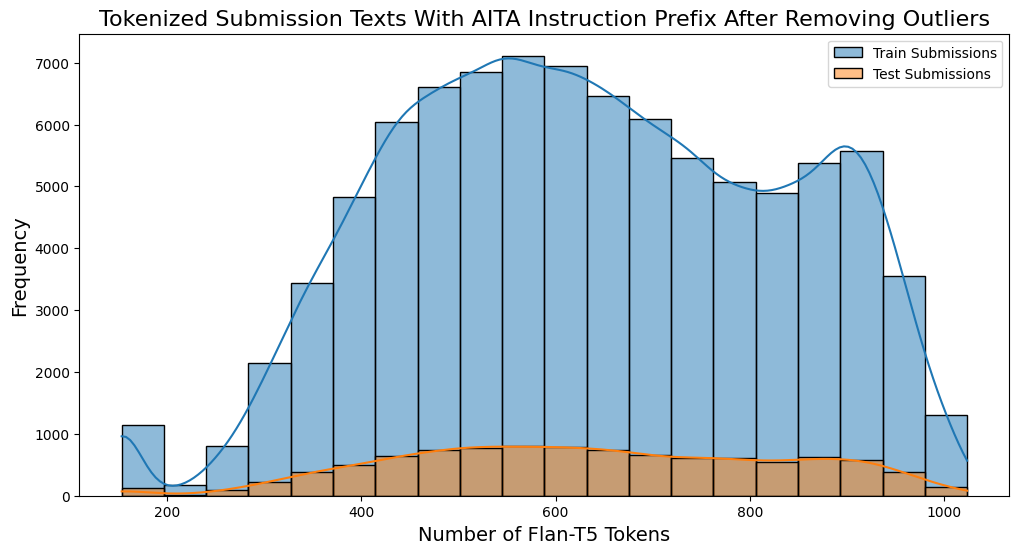

      Bin Ranges  Test  Train
 153.00 - 196.55   124   1140
 196.55 - 240.10    16    171
 240.10 - 283.65    87    803
 283.65 - 327.20   229   2152
 327.20 - 370.75   380   3445
 370.75 - 414.30   490   4828
 414.30 - 457.85   638   6040
 457.85 - 501.40   742   6600
 501.40 - 544.95   776   6842
 544.95 - 588.50   805   7112
 588.50 - 632.05   790   6949
 632.05 - 675.60   746   6454
 675.60 - 719.15   654   6097
 719.15 - 762.70   607   5458
 762.70 - 806.25   607   5066
 806.25 - 849.80   542   4889
 849.80 - 893.35   627   5372
 893.35 - 936.90   583   5580
 936.90 - 980.45   379   3544
980.45 - 1024.00   146   1305


In [ ]:
# plot histograms of tokenized submissions texts after removing outliers - with and without AITA instruction prefix

TITLE = "Tokenized Submission Texts After Removing Outliers"

plot_histogram(
    train_data = dataset['train']["submission_text_token_counts"],
    test_data = dataset['test']["submission_text_token_counts"],
    plot_title = TITLE,
    plot_xlabel = "Number of Flan-T5 Tokens",
    plot_ylabel = "Frequency",
    plot_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Encoder_Filtering/{TITLE}.png",
    bin_counts_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Encoder_Filtering/{TITLE}.csv"
)

TITLE = "Tokenized Submission Texts With AITA Instruction Prefix After Removing Outliers"

plot_histogram(
    train_data = [x + INSTRUCTION_PREFIX_TOKEN_COUNT for x in dataset['train']["submission_text_token_counts"]],
    test_data = [x + INSTRUCTION_PREFIX_TOKEN_COUNT for x in dataset['test']["submission_text_token_counts"]],
    plot_title = TITLE,
    plot_xlabel = "Number of Flan-T5 Tokens",
    plot_ylabel = "Frequency",
    plot_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Encoder_Filtering/{TITLE}.png",
    bin_counts_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Encoder_Filtering/{TITLE}.csv"
)

### Decoder Filtering (Top Comments)
- Using decoder context window size of 256

In [ ]:
FLAN_T5_DECODER_CONTEXT_LENGTH = 256

In [ ]:
from transformers import AutoTokenizer
from datasets import DatasetDict

# add FLAN-T5 token counts for submission texts to dataset

TOKENIZER = AutoTokenizer.from_pretrained("google/flan-t5-xl")
PARTITIONS = [("train", "top_comment_1", "top_comment_1_token_counts"), ("test", "top_comment_1", "top_comment_1_token_counts")]

temp_datasets = {}
for PARTITION, COLUMN, NEW_COLUMN_NAME in PARTITIONS:
    temp_datasets[PARTITION] = add_token_counts_to_dataset(dataset, PARTITION, COLUMN, TOKENIZER, NEW_COLUMN_NAME)

dataset = DatasetDict({"train": temp_datasets['train'], "test": temp_datasets['test']})

Map:   0%|          | 0/89847 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (537 > 512). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/9968 [00:00<?, ? examples/s]

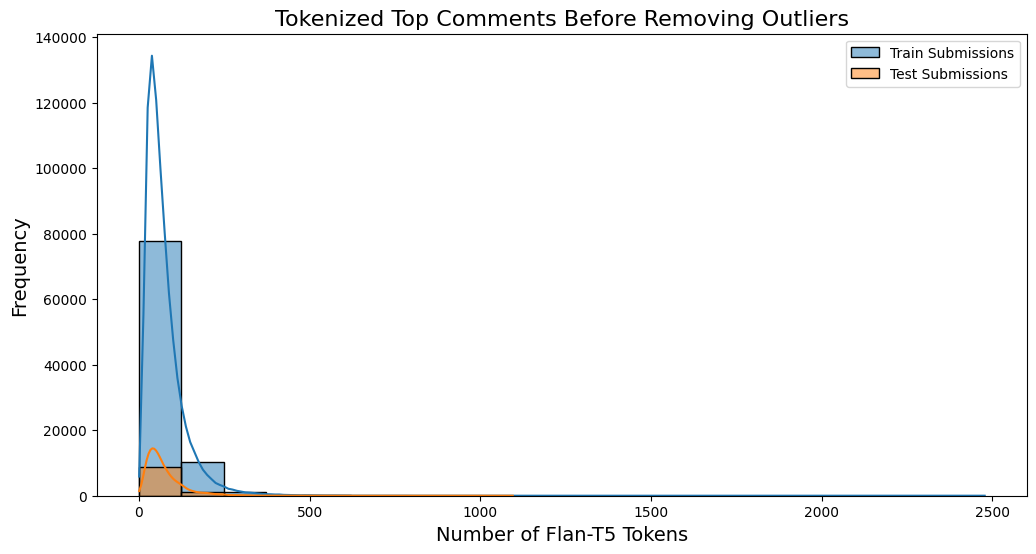

       Bin Ranges  Test  Train
    1.00 - 124.80  8664  77806
  124.80 - 248.60  1139  10380
  248.60 - 372.40   131   1246
  372.40 - 496.20    21    273
  496.20 - 620.00     8     70
  620.00 - 743.80     1     35
  743.80 - 867.60     1     16
  867.60 - 991.40     1     11
 991.40 - 1115.20     2      4
1115.20 - 1239.00     0      1
1239.00 - 1362.80     0      1
1362.80 - 1486.60     0      1
1486.60 - 1610.40     0      0
1610.40 - 1734.20     0      2
1734.20 - 1858.00     0      0
1858.00 - 1981.80     0      0
1981.80 - 2105.60     0      0
2105.60 - 2229.40     0      0
2229.40 - 2353.20     0      0
2353.20 - 2477.00     0      1


In [ ]:
# plot histograms of tokenized submissions texts before removing outliers - with and without AITA instruction prefix

TITLE = "Tokenized Top Comments Before Removing Outliers"

plot_histogram(
    train_data = dataset['train']["top_comment_1_token_counts"],
    test_data = dataset['test']["top_comment_1_token_counts"],
    plot_title = TITLE,
    plot_xlabel = "Number of Flan-T5 Tokens",
    plot_ylabel = "Frequency",
    plot_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Decoder_Filtering/{TITLE}.png",
    bin_counts_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Decoder_Filtering/{TITLE}.csv"
)

In [ ]:
# filter out samples where the tokenized instruction prefix + submission text don't fit within 1024 tokens

total_dataset_samples = {}
samples_in_context_window = {}
filtering_percent_change = {}
temp_datasets = {}

partitions = ['train', 'test']

for partition in partitions:
    total_dataset_samples[partition] = len(dataset[partition])
    temp_datasets[partition] = filter_by_token_count(dataset[partition], FLAN_T5_DECODER_CONTEXT_LENGTH, "top_comment_1_token_counts")
    samples_in_context_window[partition] = len(temp_datasets[partition])
    filtering_percent_change[partition] = (samples_in_context_window[partition] - total_dataset_samples[partition]) / total_dataset_samples[partition] * 100

dataset = DatasetDict({"train": temp_datasets['train'], "test": temp_datasets['test']})

Filter:   0%|          | 0/89847 [00:00<?, ? examples/s]

Filter:   0%|          | 0/9968 [00:00<?, ? examples/s]

In [ ]:
import json

# save filtering results to output JSON

decoder_filtering_results = {
    "train": {
        "total_samples": total_dataset_samples['train'],
        "samples_in_context_window": samples_in_context_window['train'],
        "percent_change": filtering_percent_change['train']
    },
    "test": {
        "total_samples": total_dataset_samples['test'],
        "samples_in_context_window": samples_in_context_window['test'],
        "percent_change": filtering_percent_change['test']
    }
}
file_path = '/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Decoder_Filtering/flanT5_decoder_filtering_results.json'
with open(file_path, 'w') as json_file:
    json.dump(decoder_filtering_results, json_file)

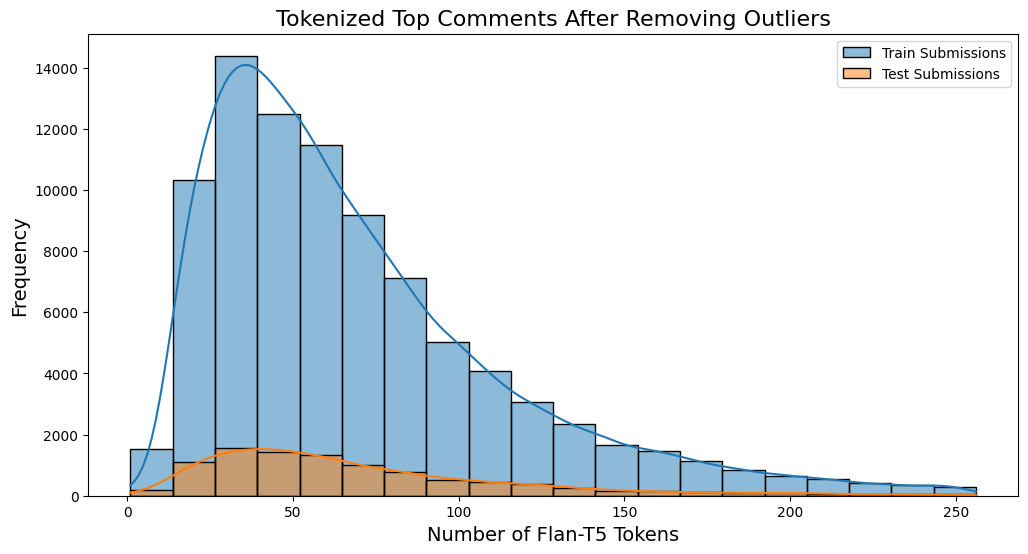

     Bin Ranges  Test  Train
   1.00 - 13.75   187   1518
  13.75 - 26.50  1108  10331
  26.50 - 39.25  1547  14389
  39.25 - 52.00  1444  12477
  52.00 - 64.75  1325  11458
  64.75 - 77.50  1004   9183
  77.50 - 90.25   792   7126
 90.25 - 103.00   516   5011
103.00 - 115.75   454   4094
115.75 - 128.50   394   3062
128.50 - 141.25   253   2331
141.25 - 154.00   167   1675
154.00 - 166.75   144   1460
166.75 - 179.50   106   1146
179.50 - 192.25    92    848
192.25 - 205.00    86    630
205.00 - 217.75    71    559
217.75 - 230.50    49    407
230.50 - 243.25    47    345
243.25 - 256.00    40    295


In [ ]:
# plot histograms of tokenized submissions texts after removing outliers - with and without AITA instruction prefix

TITLE = "Tokenized Top Comments After Removing Outliers"

plot_histogram(
    train_data = dataset['train']["top_comment_1_token_counts"],
    test_data = dataset['test']["top_comment_1_token_counts"],
    plot_title = TITLE,
    plot_xlabel = "Number of Flan-T5 Tokens",
    plot_ylabel = "Frequency",
    plot_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Decoder_Filtering/{TITLE}.png",
    bin_counts_file = f"/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Decoder_Filtering/{TITLE}.csv"
)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['submission_title', 'submission_text', 'decision', 'submission_score', 'submission_url', 'submission_date', 'top_comment_1', 'top_comment_2', 'top_comment_3', 'top_comment_4', 'top_comment_5', 'top_comment_6', 'top_comment_7', 'top_comment_8', 'top_comment_9', 'top_comment_10', 'top_comment_1_classification', 'top_comment_2_classification', 'top_comment_3_classification', 'top_comment_4_classification', 'top_comment_5_classification', 'top_comment_6_classification', 'top_comment_7_classification', 'top_comment_8_classification', 'top_comment_9_classification', 'top_comment_10_classification', 'ambiguity_score', 'submission_text_token_counts', 'top_comment_1_token_counts'],
        num_rows: 88345
    })
    test: Dataset({
        features: ['submission_title', 'submission_text', 'decision', 'submission_score', 'submission_url', 'submission_date', 'top_comment_1', 'top_comment_2', 'top_comment_3', 'top_comment_4', 'top_comment_5', '

In [ ]:
columns_to_remove = ['submission_text_token_counts', 'top_comment_1_token_counts']
dataset = dataset.map(lambda x: x, remove_columns=columns_to_remove)


In [ ]:
dataset.push_to_hub("AITA_subreddit_submissions_flanT5_filtered")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/89 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/MattBoraske/AITA_subreddit_submissions_flanT5_filtered/commit/26e5474f6113f134643e0297b502518d12928236', commit_message='Upload dataset', commit_description='', oid='26e5474f6113f134643e0297b502518d12928236', pr_url=None, pr_revision=None, pr_num=None)

### Process Results

In [ ]:
from datasets import load_dataset

dataset = load_dataset("MattBoraske/AITA_subreddit_submissions_with_ambiguity_scores")

total_dataset_samples = {}
total_dataset_samples['test'] = len(dataset['test'])
total_dataset_samples['train'] = len(dataset['train'])

In [ ]:
import json

encoder_filtering_results_path = '/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Encoder_Filtering/flanT5_encoder_filtering_results.json'
decoder_filtering_results_path = '/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/Decoder_Filtering/flanT5_decoder_filtering_results.json'

with open(encoder_filtering_results_path, 'r') as file:
  encoder_filtering_results = json.load(file)

with open(decoder_filtering_results_path, 'r') as file:
  decoder_filtering_results = json.load(file)

In [ ]:
import pandas as pd

# Creating a DataFrame
outlier_filtering_results = pd.DataFrame()

# Populating the DataFrame
for data_type in ['train', 'test']:
    total_samples = total_dataset_samples[data_type]
    after_encoder = encoder_filtering_results[data_type]['samples_in_context_window']
    encoder_percent_change = encoder_filtering_results[data_type]['percent_change']
    after_decoder = decoder_filtering_results[data_type]['samples_in_context_window']
    decoder_percent_change = decoder_filtering_results[data_type]['percent_change']

    # Calculating total percent change from total_samples to after_decoder
    total_percent_change = ((after_decoder - total_samples) / total_samples) * 100

    outlier_filtering_results = outlier_filtering_results.append({'Dataset Partition': data_type,
                    'Total Samples': total_samples,
                    'After Encoder': after_encoder,
                    'Encoder Percent Change': encoder_percent_change,
                    'After Decoder': after_decoder,
                    'Decoder Percent Change': decoder_percent_change,
                    'Total Percent Change': total_percent_change}, ignore_index=True)

<ipython-input-28-61a3e25851ae>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_filtering_results = outlier_filtering_results.append({'Dataset Partition': data_type,
<ipython-input-28-61a3e25851ae>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_filtering_results = outlier_filtering_results.append({'Dataset Partition': data_type,


In [ ]:
output_file_path = '/content/drive/MyDrive/WCU_THESIS/Dataset_Preparation/Removal_Of_Outliers/outlier_filtering_results.csv'
outlier_filtering_results.to_csv(output_file_path, index=False)